# Atividade Estatística

# Informações Iniciais
- Análise Estatística do banco de dados 'palmerpenguins' com o intuito de compreender a praticar os ensinamentos vistos em sala sobre Regressão Linear.

- **Variavel Resposta = flipper_length_mm**

## Importando pacotes

In [129]:
#manipulação dos dados
import pandas as pd

#visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão da base de dados
from sklearn.model_selection import train_test_split

# Modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Avaliação da performance do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

Básicamente toda a análise é feita no pandas, o matplotlib e o seaborn serão usados apenas para criar gráficos

## Carregando os Dados

In [66]:
dados = pd.read_csv('penguins.csv')

In [67]:
type(dados)

pandas.core.frame.DataFrame

Carregamos a base de dados em um DataFrame Pandas que é equivalente a uma tabela onde podemos ver todos as linhas e colunas

In [68]:
dados.shape

(344, 9)

Aqui temos uma visão inicial do que temos pela frente, uma "tabela" com 344 linhas e 9 colunas

In [69]:
dados.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

Aqui vemos todas as colunas do df, que nada mais são do que as variáveis a serem analisadas:
- rowid: básicamente uma coluna que serve apenas para contar o numero de pinguins
- species: variavel qualitativa nominal que descreve a especie do pinguim
- island: variavel qualitativa nominal que descreve a ilha em que foi localizado o pinguim
- bill_length_mm: variavel quantitiva discreta que mede o comprimento do bico do pinguim em milimetros
- bill_depth_mm: variavel quantitiva discreta que mede a expessura do bico do pinguim em milimetros
- flipper_length_mm: variavel quantitativa discreta que mede o tamanho da nadadeira do pinguim em milimetros
- body_mass_g: varaivel quantitativa discreta que mede o peso corporal do pinguim em gramas
- sex: variavel qualitativa nominal que descreve o sexo do pinguim
- year: variavel qualitativa que mostra o ano da analise do pinguim

Vamos reorganizar as colunas para facilitar a visualização com a variavel resposta primeiro e remover a coluna 'rowid'

In [70]:
dados = dados.drop('rowid', axis=1)

ordem_colunas = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'species', 'island', 'sex', 'year']

dados = dados.reindex(columns=ordem_colunas)

In [71]:
dados.head()

,flipper_length_mm,bill_length_mm,bill_depth_mm,body_mass_g,species,island,sex,year
0,181.0,39.1,18.7,3750.0,Adelie,Torgersen,male,2007
1,186.0,39.5,17.4,3800.0,Adelie,Torgersen,female,2007
2,195.0,40.3,18.0,3250.0,Adelie,Torgersen,female,2007
3,NaN,NaN,NaN,NaN,Adelie,Torgersen,NaN,2007
4,193.0,36.7,19.3,3450.0,Adelie,Torgersen,female,2007


Aqui vemos as 5 primeiras linhas do DataFrame onde podemos analisar o esqueleto inicial do df

## Tratamento dos dados

Quase sempre nossos bancos de dados irão vir com dados faltando ou algum outro tipo de erro. Cabe ao analista de dados tratar esses erros para prosseguir com um df completo e sem erros

In [72]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flipper_length_mm  342 non-null    float64
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   species            344 non-null    object 
 5   island             344 non-null    object 
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


Usando o método 'info()' vamos saber o tipo de dado de cada coluna junto com o numero de dados faltando
- observamos que o df tem 344 entradas e muitas colunas não possuem o mesmo numero de valores nao nulos
- Para termos uma visão mais detalhas vamos usar outro tipo de visualização

In [73]:
dados.isna().sum()

flipper_length_mm     2
bill_length_mm        2
bill_depth_mm         2
body_mass_g           2
species               0
island                0
sex                  11
year                  0
dtype: int64

aqui usamos o metodo 'isna()' para localizar os valores NaN em cada coluna e o método 'sum()' para somar todas as aparições e retornar o valor final por coluna

In [74]:
dados.dropna(axis=0, inplace=True)

utilizando o metodo 'dropna()' passando os parametros '0' e 'True' para remover todas as linhas com dados faltantes
- axis=0 determina o eixo que deve ser apagado, nesse caso apagamos as linhas
- inplace=True salva as alterações no proprio dataframe sem precisarmos criar outro

In [75]:
dados.isna().sum()

flipper_length_mm    0
bill_length_mm       0
bill_depth_mm        0
body_mass_g          0
species              0
island               0
sex                  0
year                 0
dtype: int64

Usamos novamente 'isna().sum()' e percebemos que todos os dados foram tratados

In [76]:
dados.shape

(333, 8)

Agora nosso df tem 333 linhas das 344 iniciais, ou seja 11 linhas foram removidas.
- Ou seja o tamanho da amostra é de 333

## Resumo Estatístico

In [77]:
dados.describe()

,flipper_length_mm,bill_length_mm,bill_depth_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,200.966967,43.992793,17.164865,4207.057057,2008.042042
std,14.015765,5.468668,1.969235,805.215802,0.812944
min,172.000000,32.100000,13.100000,2700.000000,2007.000000
25%,190.000000,39.500000,15.600000,3550.000000,2007.000000
50%,197.000000,44.500000,17.300000,4050.000000,2008.000000
75%,213.000000,48.600000,18.700000,4775.000000,2009.000000
max,231.000000,59.600000,21.500000,6300.000000,2009.000000


Usamos o metodo 'describe()' para exibir informaçoes estatisticas do df, como por exemplo:
- count: numero de registros, importante para sabermos o tamanho da amostra
- mean: media aritmética, devemos ficar atentos ao que ela representa, pois o resultando nem sempre reflete a realidade.
- std: desvio padrao, como os dados se dispersam em relação a média
- min: valor minimo, os valores min e max nos auxiliam para identificar a amplitude da amostra
- 25%: primeiro quartil, os quartis sao valores que nos mostram de que forma os dados estao distribuidos
- 50%: segundo quartil (**ou mediana**)
- 75%: terceiro quartil
- max: valor maximo

Obs: Podemos observar que apenas as váriaveis quantitativas foram retornadas

- A intenção ao usar o 'describe()' é observar, de maneira geral, se há algum valor fora do padrão e se os dados estão dispersos da médiana.

## Visualização Inicial dos Dados

Iremos começar a visualizar os dados em busca de algo que pode ser relavante nessa fase inicial da analise.

Vamos chegar a distribuição de todas as váriaveis envolvidas

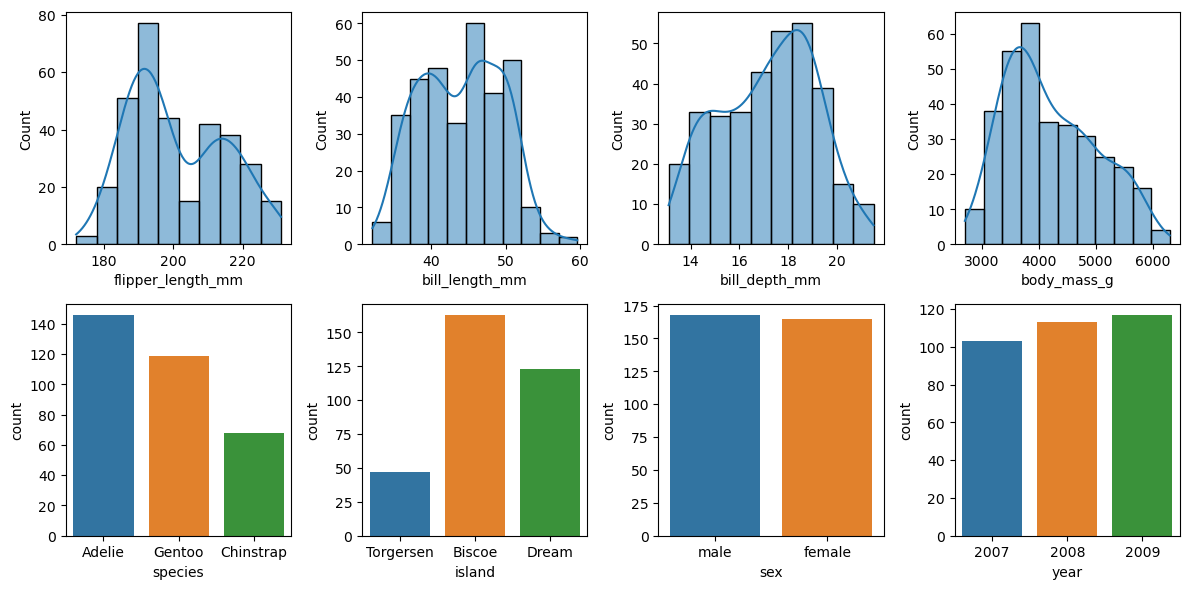

In [85]:
# Criando uma figura e eixos para os subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

#plotando histograma das variaveis quantitativas
sns.histplot(data=dados, x='flipper_length_mm', kde=True, ax=axs[0, 0])
sns.histplot(data=dados, x='bill_length_mm', kde=True, ax=axs[0, 1])
sns.histplot(data=dados, x='bill_depth_mm', kde=True, ax=axs[0, 2])
sns.histplot(data=dados, x='body_mass_g', kde=True, ax=axs[0, 3])

#plotando grafico para as variaveis qualitativas
sns.countplot(x=dados['species'], ax=axs[1][0])
sns.countplot(x=dados['island'], ax=axs[1][1])
sns.countplot(x=dados['sex'], ax=axs[1][2])
sns.countplot(x=dados['year'], ax=axs[1][3])

# Ajustando o layout
plt.tight_layout()

# Exibindo o plot
plt.show()

## Correlação entre as variaveis

- Como temos variaveis qualitativas que podem influenciar na variavel resposta precisamos converter as variaveis.
- Para fazer isso usaremos o método de Codificação One-Hot no qual cada categoria qualitativa é transformada em uma nova variavel binária.

In [98]:
dados_encoded = pd.get_dummies(dados, columns=['species', 'island', 'sex'])

In [99]:
correlacao = dados_encoded.corr(method='pearson')
correlacao

,flipper_length_mm,bill_length_mm,bill_depth_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
flipper_length_mm,1.000000,0.653096,-0.577792,0.872979,0.151068,-0.685947,-0.186175,0.866854,0.601126,-0.425459,-0.273304,-0.255169,0.255169
bill_length_mm,0.653096,1.000000,-0.228626,0.589451,0.032657,-0.836409,0.449098,0.488256,0.225174,0.032118,-0.367821,-0.344078,0.344078
bill_depth_mm,-0.577792,-0.228626,1.000000,-0.472016,-0.048182,0.531342,0.323505,-0.822293,-0.626230,0.457326,0.265173,-0.372673,0.372673
body_mass_g,0.872979,0.589451,-0.472016,1.000000,0.021862,-0.550479,-0.298622,0.821178,0.623702,-0.464666,-0.251369,-0.424987,0.424987
year,0.151068,0.032657,-0.048182,0.021862,1.000000,0.013882,-0.044591,0.023137,0.052894,-0.047304,-0.010370,0.000467,-0.000467
species_Adelie,-0.685947,-0.836409,0.531342,-0.550479,0.013882,1.000000,-0.447597,-0.658904,-0.332518,0.013443,0.458786,0.007961,-0.007961
species_Chinstrap,-0.186175,0.449098,0.323505,-0.298622,-0.044591,-0.447597,1.000000,-0.377744,-0.496022,0.661894,-0.205351,0.004564,-0.004564
species_Gentoo,0.866854,0.488256,-0.822293,0.821178,0.023137,-0.658904,-0.377744,1.000000,0.761548,-0.570702,-0.302296,-0.012082,0.012082
island_Biscoe,0.601126,0.225174,-0.626230,0.623702,0.052894,-0.332518,-0.496022,0.761548,1.000000,-0.749398,-0.396949,-0.009201,0.009201
island_Dream,-0.425459,0.032118,0.457326,-0.464666,-0.047304,0.013443,0.661894,-0.570702,-0.749398,1.000000,-0.310248,0.000673,-0.000673


Colocando essa tabela em um heatmap para facilitar a visualização

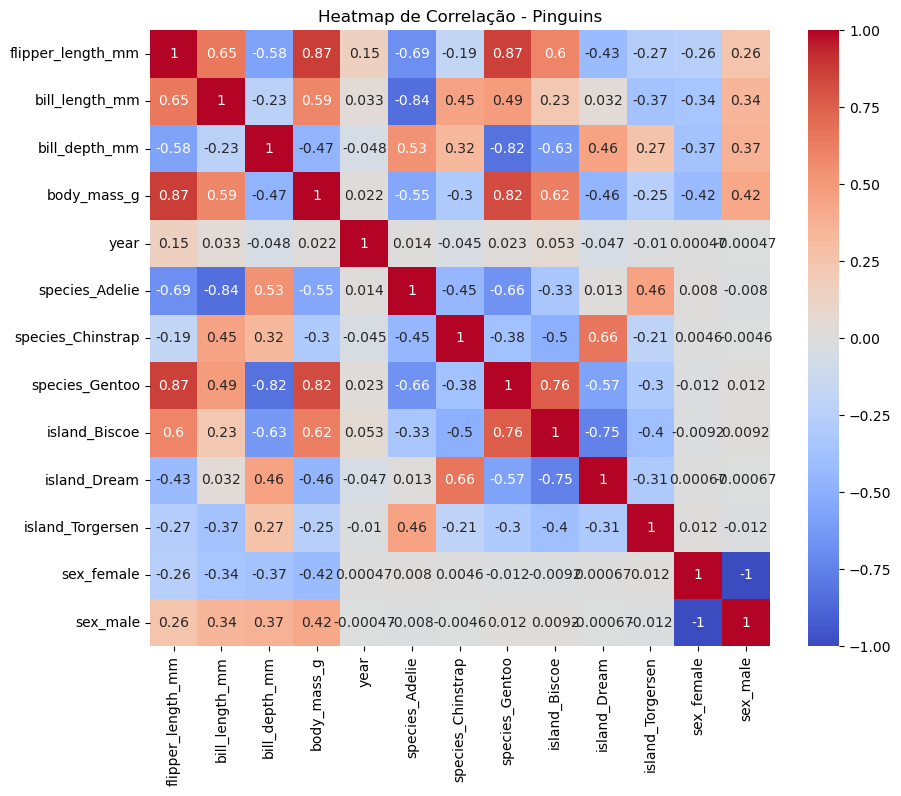

In [100]:
# Plotar o heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação - Pinguins')
plt.show()

Ao analisar o mapa de correlação podemos extrair que:
- 'body_mass_g' e 'species_Gentoo' são as variáveis com maior coeficiente de correlação positiva
- 'bill_length_mm' e 'island_Biscoe' tambem tem um coeficiente positivo significativo
- 'bill_depth_mm' e 'species_Adelie' são  as variaveis com maior coeficiente de correlação negativa

Analisando o scatterplot (Diagrama de dispersão) entre 'body_mass_g' e a variavel resposta

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

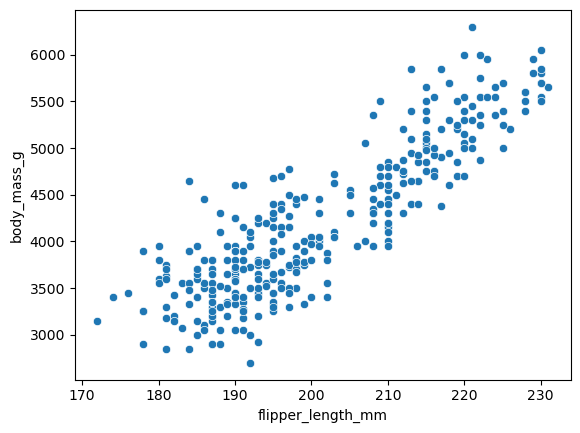

In [111]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=dados_encoded)

Agora iremos começar a parte da Regressão Linear

## Modelo de Regressão Linear

Começamos pela divisão de dados para Regressão Linear

In [113]:
X = dados_encoded.drop(['flipper_length_mm'], axis=1)
#adicionando a constante
sm.add_constant(X)

y = dados_encoded['flipper_length_mm']

#

Divisão dos dados em Base de Treino e Base de Teste

In [122]:
# Divisão dos dados em Treino e Teste 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


ValueError: x and y must have same first dimension, but have shapes (333,) and (233,)

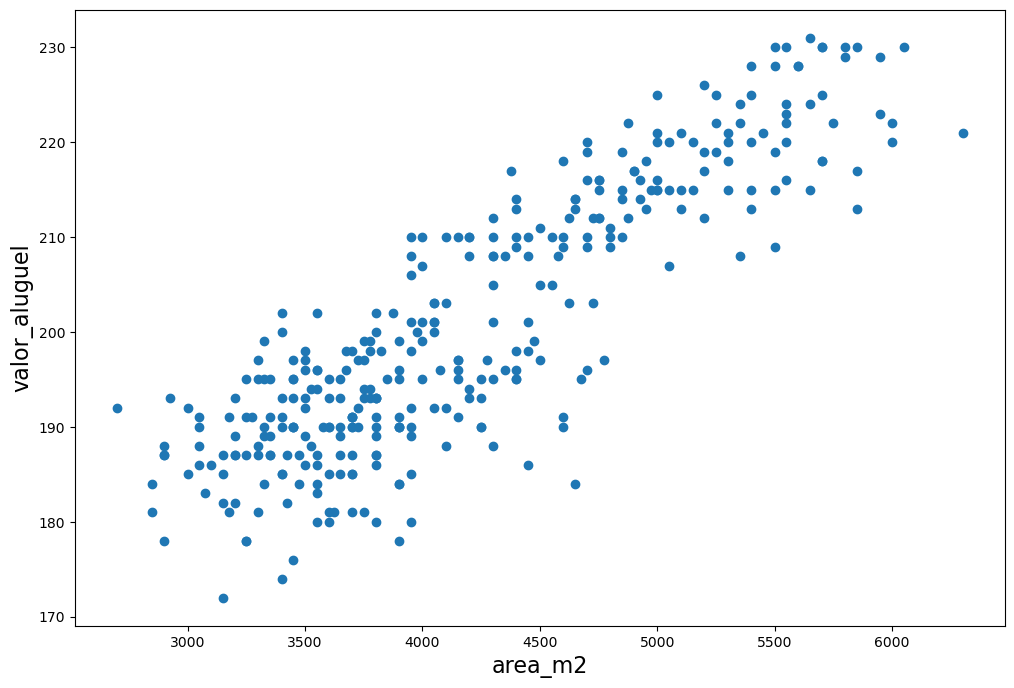

In [128]:
# Plot
plt.figure(figsize = (12, 8))
plt.xlabel("area_m2", size = 16)
plt.ylabel("valor_aluguel", size = 16)
plt.plot(X["body_mass_g"], y, "o", label = "Dados Reais")
plt.plot(X["body_mass_g"], treino.fittedvalues, "r-", label = "Linha de Regressão (Previsões do Modelo)")
plt.legend(loc = "best")
plt.show()

Treinando Modelo

In [115]:
modelo = sm.OLS(y_train, X_train)
treino = modelo.fit()

Depois de treinado vamos imprimir o resumo da regressão

In [116]:
treino.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     195.0
Date:                Fri, 26 Apr 2024   Prob (F-statistic):          1.81e-100
Time:                        02:46:57   Log-Likelihood:                -693.34
No. Observations:                 233   AIC:                             1407.
Df Residuals:                     223   BIC:                             1441.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bill_length_mm        0.1581      0.143      1.103      0.271      -0.124       0.441
bill_depth_mm         1.1678      0.390      2.994      0.003       0.399       1.937
body_mass_g           0.0049      0.001      4.646      0.000       0.003       0.007
year                  2.4444      0.394      6.206      0.000       1.668       3.221
species_Adelie    -1368.4890    226.168     -6.051      0.000   -1814.189    -922.789
species_Chinstrap -1363.0782    226.007     -6.031      0.000   -1808.460    -917.696
species_Gentoo    -1344.2060    225.951     -5.949      0.000   -1789.478    -898.934
island_Biscoe     -1359.4065    226.052     -6.014      0.000   -1804.878    -913.935
island_Dream      -1358.8603    226.039     -6.012      0.000   -1804.306    -913.415
island_Torgersen  -1357.5063    226.025     -6.006      0.000   -1802.925    -912.088
sex_female        -2038.3875    339.052     -6.012      0.000   -2706.544   -1370.231
sex_male          -2037.3857    339.061     -6.009      0.000   -2705.560   -1369.211
==============================================================================
Omnibus:                        3.792   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.945
Skew:                          -0.157   Prob(JB):                        0.139
Kurtosis:                       3.555   Cond. No.                     4.24e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.87e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Agora iremos verificar a medida de MAE e MSE, tanto na base de treino quanto na base de testes.

In [117]:
# Imprime as métricas de MAE
print(f'Métrica MAE na base de treino: {mean_absolute_error(y_train, treino.predict(X_train))}')
print(f'Métrica MAE na base de teste: {mean_absolute_error(y_test, treino.predict(X_test))}')

Métrica MAE na base de treino: 3.6874320668222764
Métrica MAE na base de teste: 3.8181616759482155


Idealmente, você deseja que o MAE seja baixo tanto nos dados de treinamento quanto nos dados de teste, indicando que o modelo é capaz de fazer previsões precisas em ambos.

Se o MAE é muito baixo nos dados de treinamento, mas significativamente mais alto nos dados de teste, é um sinal de overfitting.
Se o MAE é alto em ambos os conjuntos de dados (treinamento e teste), indica que o modelo é muito simples (underfitting) ou há um problema com a modelagem.

In [119]:
# Imprime as métricas de MSE
print(f'Métrica MSE na base de treino: {mean_squared_error(y_train, treino.predict(X_train))}')
print(f'Métrica MSE na base de teste: {mean_squared_error(y_test, treino.predict(X_test))}')


Métrica MSE na base de treino: 22.50051123600785
Métrica MSE na base de teste: 24.670623754163156


In [ ]:
plt.scatter(x_train, y_train, label='Dados de Treinamento')
plt.scatter(x_test, y_test, color='red', label='Dados de Teste')
plt.plot(x_train, pred_train, label='Previsões no Treinamento')
plt.plot(x_test, pred_test, color='orange', label='Previsões no Teste')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Regressão Linear')
plt.show()

## Conclusão

O modelo foi treinado com sucesso. 
- A métrica de R² nos mostra que o modelo consegue explicar 88,7% da variância dos dados
- As métricas de MSE e MAE nos mostram que o modelo tem uma performance aceitável, dentro das suas limitações.

# FALTA FAZER
- teste T
